# Cartopy Route Map Builder

By Kenneth Burchfiel

Released under the MIT license

This program shows how the Cartopy mapping library can be used to generate airline route maps using a table generated from flights_table_builder.ipynb.

I may add in more documentation later; however, in the future, I plan to try using Folium to generate these maps instead, so I may not update this particular .ipynb file.

**Note**: The following files were not included in the GitHub repository because their size exceeds 100MB:
1. routes_planes_coordinates.csv
2. routes_planes_coordinates_for_mapping.csv
3. 21503323_T_T100_SEGMENT_ALL_CARRIER.csv

You can instead retrieve these files from my copy of this project on Google Drive, available at https://drive.google.com/drive/folders/1jRTjoZtT6OWCXRTNstG9D4CxmjXe4W8q?usp=sharing .

In [1]:
import pandas as pd
import cartopy.crs as ccrs # https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html

import matplotlib.pyplot as plt

In [2]:
df_routes_planes_airports_for_mapping = pd.read_csv('routes_planes_coordinates_for_mapping.csv')

In [3]:
df_routes_planes_airports = pd.read_csv('routes_planes_coordinates.csv')

In [4]:
airport_list = []
airline_list = []
aircraft_list = []

40.64 -73.779 33.64 -84.427
-23.432 -46.469 33.64 -84.427
33.64 -84.427 53.421 -6.27
47.449 -122.309 33.64 -84.427
33.64 -84.427 -22.809 -43.244
33.64 -84.427 40.64 -73.779
33.64 -84.427 44.88 -93.217
33.64 -84.427 37.619 -122.375
33.64 -84.427 40.788 -111.978
36.124 -86.678 33.64 -84.427
33.939 -81.119 33.64 -84.427
35.214 -80.943 33.64 -84.427
44.88 -93.217 33.64 -84.427
32.127 -81.202 33.64 -84.427
37.619 -122.375 33.64 -84.427
40.788 -111.978 33.64 -84.427
33.64 -84.427 33.942 -118.408
33.942 -118.408 33.64 -84.427
33.64 -84.427 47.449 -122.309
42.212 -83.353 44.88 -93.217
28.429 -81.316 33.64 -84.427
35.042 -89.977 33.64 -84.427
28.429 -81.316 44.88 -93.217
44.88 -93.217 28.429 -81.316
44.88 -93.217 47.449 -122.309
47.449 -122.309 44.88 -93.217
33.64 -84.427 49.013 2.55
33.64 -84.427 40.472 -3.561
44.88 -93.217 63.985 -22.606
33.64 -84.427 42.212 -83.353
33.563 -86.753 33.64 -84.427
53.319 -60.426 33.64 -84.427
33.64 -84.427 -23.008 -47.134
44.88 -93.217 42.212 -83.353
49.013 2.55

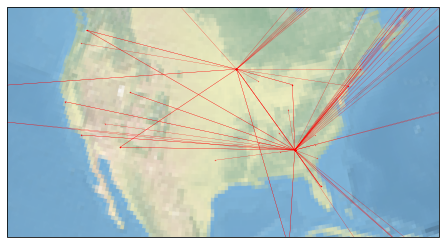

,Unnamed: 0,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,...,Code_y,Plane_Group_Text,Code,Plane_Config_Text,origin_iata_code,origin_lat,origin_lon,destination_iata_code,destination_lat,destination_lon
3742,6040,0.0,3.0,295005.0,878.0,524.0,10120.0,0.0,760.0,432.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,JFK,40.640,-73.779,ATL,33.640,-84.427
5639,10262,0.0,1.0,85065.0,234.0,223.0,26245.0,0.0,4653.0,667.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,GRU,-23.432,-46.469,ATL,33.640,-84.427
5663,10286,0.0,1.0,85065.0,232.0,207.0,16155.0,0.0,3938.0,490.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,ATL,33.640,-84.427,DUB,53.421,-6.270
5913,12198,0.0,1.0,98335.0,293.0,156.0,11320.0,0.0,2182.0,282.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,SEA,47.449,-122.309,ATL,33.640,-84.427
6023,12318,0.0,1.0,98335.0,293.0,189.0,3532.0,684.0,4735.0,585.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,ATL,33.640,-84.427,GIG,-22.809,-43.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220647,328614,21.0,21.0,2065035.0,6150.0,5016.0,0.0,0.0,1682.0,5210.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,CUN,21.036,-86.877,MSP,44.880,-93.217
220649,328616,21.0,21.0,2065035.0,6153.0,4491.0,0.0,0.0,1682.0,5205.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,MSP,44.880,-93.217,CUN,21.036,-86.877
223186,331971,22.0,22.0,2163370.0,6445.0,6014.0,330256.0,6179.0,4502.0,11297.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,HNL,21.316,-157.927,ATL,33.640,-84.427
223252,332051,22.0,22.0,2163370.0,6439.0,6115.0,215329.0,67335.0,4502.0,12915.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,ATL,33.640,-84.427,HNL,21.316,-157.927


In [5]:
def route_query(data_source, airport_list = None, airline_list = None, aircraft_list = None, map_type = 'world', file_name = 'routes.png'):
    df_for_mapping = data_source.copy()
    if airline_list != None:
        df_for_mapping = df_for_mapping.query("UNIQUE_CARRIER_NAME in @airline_list")
    if aircraft_list != None:
        df_for_mapping = df_for_mapping.query("Plane_Type_Text in @aircraft_list")
    if airport_list != None:
        df_for_mapping = df_for_mapping.query("ORIGIN in @airport_list or DEST in @airport_list")
    df_for_mapping = df_for_mapping.drop_duplicates(['ORIGIN', 'DEST'])
    
    # Much of the following is based off the example shown here: https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html

    if map_type == 'US':
        ax = plt.axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
        ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic()) # From https://scitools.org.uk/cartopy/docs/v0.15/examples/hurricane_katrina.html
        ax.stock_img()

    else:
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.stock_img()

    data_source = df_for_mapping

    for i in range(len(data_source)):

        origin_latitude = data_source.iloc[i,data_source.columns.get_loc('origin_lat')]
        origin_longitude = data_source.iloc[i,data_source.columns.get_loc('origin_lon')]
        destination_latitude = data_source.iloc[i,data_source.columns.get_loc('destination_lat')]
        destination_longitude = data_source.iloc[i,data_source.columns.get_loc('destination_lon')]

        print(origin_latitude,origin_longitude,destination_latitude,destination_longitude)

        plt.plot([origin_longitude, destination_longitude], [origin_latitude, destination_latitude],
                color='red', linewidth=0.2, marker='o', markersize=0.2,
                transform=ccrs.Geodetic(),
                )

    plt.savefig('cartopy_maps\\'+file_name, dpi = 400)

    plt.show()


    return df_for_mapping

new_df = route_query(data_source = df_routes_planes_airports_for_mapping, airline_list = ['Delta Air Lines Inc.'], aircraft_list = ['Airbus Industrie A330-200', 'Airbus Industrie A330-300'], airport_list = ['ATL', 'MSP'], map_type = 'US', file_name = 'DL_A330_ATL_MSP_routes_2018.png')
new_df.to_csv('dl_a330_flights_from_atl_and_msp.csv')
new_df



    

In [6]:
df_delta_unique_routes = df_routes_planes_airports.query("UNIQUE_CARRIER_NAME == 'Delta Air Lines Inc.'").copy().drop_duplicates(['ORIGIN', 'DEST'])
df_delta_unique_routes

,Unnamed: 0,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,...,Code_y,Plane_Group_Text,Code,Plane_Config_Text,origin_iata_code,origin_lat,origin_lon,destination_iata_code,destination_lat,destination_lon
5900,5900,0.0,1.0,32870.0,149.0,120.0,597.0,0.0,232.0,107.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DSM,41.534,-93.663,MSP,44.880,-93.217
5904,5904,0.0,2.0,77758.0,317.0,147.0,0.0,0.0,489.0,162.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DTW,42.212,-83.353,ALB,42.748,-73.803
5905,5905,0.0,2.0,76340.0,316.0,189.0,0.0,0.0,456.0,179.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DTW,42.212,-83.353,BNA,36.124,-86.678
5907,5907,0.0,1.0,61740.0,234.0,123.0,57.0,0.0,632.0,98.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DTW,42.212,-83.353,BOS,42.364,-71.005
5908,5908,0.0,1.0,49760.0,72.0,0.0,0.0,0.0,241.0,74.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DTW,42.212,-83.353,BUF,42.940,-78.732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430120,430120,57.0,56.0,1831200.0,6944.0,6438.0,358.0,0.0,646.0,6084.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,ATL,33.640,-84.427,EYW,24.556,-81.759
430744,430744,57.0,57.0,1863900.0,7068.0,6502.0,0.0,0.0,646.0,6455.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,EYW,24.556,-81.759,ATL,33.640,-84.427
439736,439736,62.0,62.0,2135652.0,8183.0,6748.0,0.0,0.0,205.0,3647.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,NaN,NaN,NaN,SLC,40.788,-111.978
452425,452425,80.0,80.0,3980800.0,15916.0,14193.0,22910.0,24307.0,1919.0,19260.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,SNA,33.676,-117.868,ATL,33.640,-84.427


In [7]:
df_delta_unique_routes.dropna(axis=0,subset=['origin_iata_code', 'destination_iata_code', 'destination_lat', 'destination_lon'],inplace=True) # 3363 rows
df_delta_unique_routes = df_delta_unique_routes.copy().query("origin_lat != 0 and origin_lon != 0 and destination_lat != 0 and destination_lon != 0") # now 3308 rows
df_delta_unique_routes.to_csv('test_routes.csv')
df_delta_unique_routes


,Unnamed: 0,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,...,Code_y,Plane_Group_Text,Code,Plane_Config_Text,origin_iata_code,origin_lat,origin_lon,destination_iata_code,destination_lat,destination_lon
5900,5900,0.0,1.0,32870.0,149.0,120.0,597.0,0.0,232.0,107.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DSM,41.534,-93.663,MSP,44.880,-93.217
5904,5904,0.0,2.0,77758.0,317.0,147.0,0.0,0.0,489.0,162.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DTW,42.212,-83.353,ALB,42.748,-73.803
5905,5905,0.0,2.0,76340.0,316.0,189.0,0.0,0.0,456.0,179.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DTW,42.212,-83.353,BNA,36.124,-86.678
5907,5907,0.0,1.0,61740.0,234.0,123.0,57.0,0.0,632.0,98.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DTW,42.212,-83.353,BOS,42.364,-71.005
5908,5908,0.0,1.0,49760.0,72.0,0.0,0.0,0.0,241.0,74.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DTW,42.212,-83.353,BUF,42.940,-78.732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421692,421692,53.0,53.0,1584700.0,5830.0,4357.0,0.0,0.0,1085.0,8065.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,MTY,25.778,-100.107,ATL,33.640,-84.427
430120,430120,57.0,56.0,1831200.0,6944.0,6438.0,358.0,0.0,646.0,6084.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,ATL,33.640,-84.427,EYW,24.556,-81.759
430744,430744,57.0,57.0,1863900.0,7068.0,6502.0,0.0,0.0,646.0,6455.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,EYW,24.556,-81.759,ATL,33.640,-84.427
452425,452425,80.0,80.0,3980800.0,15916.0,14193.0,22910.0,24307.0,1919.0,19260.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,SNA,33.676,-117.868,ATL,33.640,-84.427


In [8]:
planes_list = ['Airbus Industrie A330-200', 'Airbus Industrie A330-300']
# airlines_list 

test_delta_query = df_delta_unique_routes.query("Plane_Type_Text in @planes_list")
test_delta_query

,Unnamed: 0,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,...,Code_y,Plane_Group_Text,Code,Plane_Config_Text,origin_iata_code,origin_lat,origin_lon,destination_iata_code,destination_lat,destination_lon
5925,5925,0.0,1.0,98335.0,293.0,289.0,0.0,0.0,1979.0,300.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,DTW,42.212,-83.353,LAX,33.942,-118.408
5986,5986,0.0,1.0,98335.0,285.0,224.0,17306.0,0.0,2556.0,320.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,HNL,21.316,-157.927,LAX,33.942,-118.408
6044,6044,0.0,1.0,98335.0,293.0,289.0,0.0,0.0,509.0,171.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,JFK,40.640,-73.779,DTW,42.212,-83.353
10262,10262,0.0,1.0,85065.0,234.0,223.0,26245.0,0.0,4653.0,667.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,GRU,-23.432,-46.469,ATL,33.640,-84.427
10286,10286,0.0,1.0,85065.0,232.0,207.0,16155.0,0.0,3938.0,490.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,ATL,33.640,-84.427,DUB,53.421,-6.270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260233,260233,5.0,4.0,393340.0,1172.0,1004.0,54149.0,0.0,5578.0,2876.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,AMS,52.309,4.764,LAX,33.942,-118.408
308896,308896,16.0,16.0,1361040.0,3739.0,3117.0,33424.0,0.0,5844.0,10242.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,ATL,33.640,-84.427,LOS,6.577,3.321
308899,308899,16.0,16.0,1361040.0,3744.0,3210.0,73901.0,0.0,5844.0,12321.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,LOS,6.577,3.321,ATL,33.640,-84.427
356396,356396,27.0,27.0,2655045.0,7871.0,7172.0,243635.0,42880.0,5677.0,17046.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,JFK,40.640,-73.779,TLV,32.009,34.877


42.212 -83.353 33.942 -118.408
21.316 -157.927 33.942 -118.408
40.64 -73.779 42.212 -83.353
-23.432 -46.469 33.64 -84.427
33.64 -84.427 53.421 -6.27
35.765 140.386 42.212 -83.353
35.765 140.386 47.449 -122.309
47.449 -122.309 35.765 140.386
47.449 -122.309 33.64 -84.427
49.91 -97.234 33.942 -118.408
33.64 -84.427 -22.809 -43.244
40.64 -73.779 47.465 8.549
47.465 8.549 40.64 -73.779
33.64 -84.427 33.942 -118.408
41.939 -72.683 40.64 -73.779
40.64 -73.779 44.881 -63.509
33.942 -118.408 33.64 -84.427
33.942 -118.408 41.939 -72.683
42.212 -83.353 -23.008 -47.134
21.316 -157.927 37.619 -122.375
40.64 -73.779 48.937 -54.568
44.88 -93.217 47.449 -122.309
52.309 4.764 32.127 -81.202
33.64 -84.427 49.013 2.55
33.64 -84.427 40.472 -3.561
49.013 2.55 39.872 -75.241
41.813 12.253 33.939 -81.119
41.813 12.253 35.214 -80.943
40.64 -73.779 44.412 8.842
44.88 -93.217 63.985 -22.606
53.319 -60.426 33.64 -84.427
33.64 -84.427 -23.008 -47.134
35.255 136.924 47.449 -122.309
42.212 -83.353 -23.432 -46.469


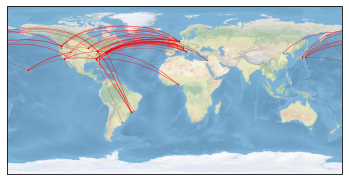

In [9]:
# Much of the following is based off the example shown here: https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html


ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()



data_source = test_delta_query
airline_name = 'delta'
year = 2018

for i in range(len(data_source)):

    origin_latitude = data_source.iloc[i,data_source.columns.get_loc('origin_lat')]
    origin_longitude = data_source.iloc[i,data_source.columns.get_loc('origin_lon')]
    destination_latitude = data_source.iloc[i,data_source.columns.get_loc('destination_lat')]
    destination_longitude = data_source.iloc[i,data_source.columns.get_loc('destination_lon')]

    print(origin_latitude,origin_longitude,destination_latitude,destination_longitude)

    plt.plot([origin_longitude, destination_longitude], [origin_latitude, destination_latitude],
            color='red', linewidth=0.2, marker='o', markersize=0.2,
            transform=ccrs.Geodetic(),
            )

plt.savefig('cartopy_maps\\'+airline_name+'_'+str(year)+'_a330_routes_world_map.png', dpi = 400)

plt.show()



In [10]:
df_unique_routes = df_routes_planes_airports.copy().drop_duplicates(['ORIGIN', 'DEST'])
df_unique_routes

,Unnamed: 0,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,...,Code_y,Plane_Group_Text,Code,Plane_Config_Text,origin_iata_code,origin_lat,origin_lon,destination_iata_code,destination_lat,destination_lon
0,0,0.0,1.0,21502.0,76.0,3.0,0.0,0.0,901.0,170.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,IAD,38.944,-77.456,FLL,26.072,-80.153
1,1,0.0,3.0,64506.0,228.0,75.0,0.0,0.0,228.0,219.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,IAD,38.944,-77.456,JFK,40.640,-73.779
2,2,0.0,1.0,21502.0,76.0,64.0,0.0,0.0,851.0,144.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,IAH,29.980,-95.340,SAV,32.127,-81.202
3,3,0.0,1.0,21502.0,76.0,55.0,0.0,0.0,122.0,58.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,ILM,34.271,-77.903,RDU,35.877,-78.787
4,4,0.0,1.0,12500.0,50.0,34.0,0.0,0.0,133.0,49.0,...,6,"Jet, 2-Engine",1,Passenger Configuration,IND,39.717,-86.294,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476896,476896,160.0,160.0,444960.0,1440.0,851.0,0.0,0.0,101.0,7584.0,...,1,"Piston, 2-Engine",1,Passenger Configuration,NaN,NaN,NaN,STL,38.748,-90.360
477001,477001,161.0,161.0,447741.0,1449.0,796.0,0.0,0.0,101.0,7631.0,...,1,"Piston, 2-Engine",1,Passenger Configuration,STL,38.748,-90.360,NaN,NaN,NaN
477104,477104,163.0,161.0,2012500.0,1932.0,1426.0,0.0,0.0,43.0,4602.0,...,4,"Turbo-Prop, 1-Engine/2-Engine",4,Seaplane,SPB,45.773,-122.862,NaN,NaN,NaN
477105,477105,163.0,161.0,2012500.0,1939.0,1498.0,0.0,0.0,43.0,4596.0,...,4,"Turbo-Prop, 1-Engine/2-Engine",4,Seaplane,NaN,NaN,NaN,SPB,45.773,-122.862


41.534 -93.663 44.88 -93.217
42.212 -83.353 42.748 -73.803
42.212 -83.353 36.124 -86.678
42.212 -83.353 42.364 -71.005
42.212 -83.353 42.94 -78.732
42.212 -83.353 35.035 -85.204
42.212 -83.353 41.412 -81.85
42.212 -83.353 35.214 -80.943
42.212 -83.353 39.998 -82.892
42.212 -83.353 39.902 -84.219
42.212 -83.353 38.852 -77.037
42.212 -83.353 40.64 -73.779
42.212 -83.353 33.942 -118.408
42.212 -83.353 40.777 -73.872
42.212 -83.353 28.429 -81.316
42.212 -83.353 42.947 -87.896
42.212 -83.353 43.14 -89.337
42.212 -83.353 44.88 -93.217
42.212 -83.353 35.393 -97.601
42.212 -83.353 34.056 -117.601
42.212 -83.353 41.979 -87.904
42.212 -83.353 26.683 -80.096
42.212 -83.353 39.872 -75.241
42.212 -83.353 41.724 -71.428
42.212 -83.353 26.536 -81.755
42.212 -83.353 40.788 -111.978
42.212 -83.353 27.975 -82.533
42.212 -83.353 43.677 -79.631
40.692 -74.169 33.64 -84.427
40.692 -74.169 42.47 -71.289
40.692 -74.169 42.364 -71.005
40.692 -74.169 42.94 -78.732
40.692 -74.169 35.214 -80.943
40.692 -74.169 4

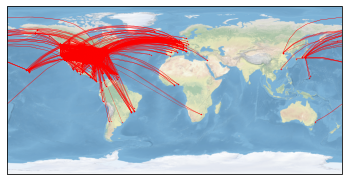

In [11]:
# Much of the following is based off the example shown here: https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html


ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

data_source = df_delta_unique_routes
airline_name = 'delta'
year = 2018

for i in range(len(data_source)):

    origin_latitude = data_source.iloc[i,data_source.columns.get_loc('origin_lat')]
    origin_longitude = data_source.iloc[i,data_source.columns.get_loc('origin_lon')]
    destination_latitude = data_source.iloc[i,data_source.columns.get_loc('destination_lat')]
    destination_longitude = data_source.iloc[i,data_source.columns.get_loc('destination_lon')]

    print(origin_latitude,origin_longitude,destination_latitude,destination_longitude)

    plt.plot([origin_longitude, destination_longitude], [origin_latitude, destination_latitude],
            color='red', linewidth=0.2, marker='o', markersize=0.2,
            transform=ccrs.Geodetic(),
            )

plt.savefig('cartopy_maps\\'+airline_name+'_'+str(year)+'_routes_world_map.png', dpi = 400)

plt.show()



41.534 -93.663 44.88 -93.217
42.212 -83.353 42.748 -73.803
42.212 -83.353 36.124 -86.678
42.212 -83.353 42.364 -71.005
42.212 -83.353 42.94 -78.732
42.212 -83.353 35.035 -85.204
42.212 -83.353 41.412 -81.85
42.212 -83.353 35.214 -80.943
42.212 -83.353 39.998 -82.892
42.212 -83.353 39.902 -84.219
42.212 -83.353 38.852 -77.037
42.212 -83.353 40.64 -73.779
42.212 -83.353 33.942 -118.408
42.212 -83.353 40.777 -73.872
42.212 -83.353 28.429 -81.316
42.212 -83.353 42.947 -87.896
42.212 -83.353 43.14 -89.337
42.212 -83.353 44.88 -93.217
42.212 -83.353 35.393 -97.601
42.212 -83.353 34.056 -117.601
42.212 -83.353 41.979 -87.904
42.212 -83.353 26.683 -80.096
42.212 -83.353 39.872 -75.241
42.212 -83.353 41.724 -71.428
42.212 -83.353 26.536 -81.755
42.212 -83.353 40.788 -111.978
42.212 -83.353 27.975 -82.533
42.212 -83.353 43.677 -79.631
40.692 -74.169 33.64 -84.427
40.692 -74.169 42.47 -71.289
40.692 -74.169 42.364 -71.005
40.692 -74.169 42.94 -78.732
40.692 -74.169 35.214 -80.943
40.692 -74.169 4

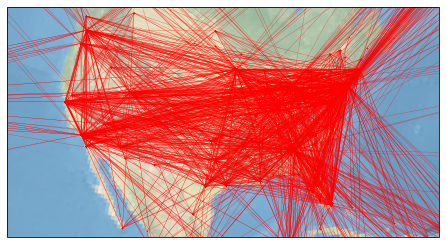

In [12]:
# Much of the following is based off the example shown here: https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html

ax = plt.axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic()) # From https://scitools.org.uk/cartopy/docs/v0.15/examples/hurricane_katrina.html
ax.stock_img()

data_source = df_delta_unique_routes
airline_name = 'delta'
year = 2018

for i in range(len(data_source)):

    origin_latitude = data_source.iloc[i,data_source.columns.get_loc('origin_lat')]
    origin_longitude = data_source.iloc[i,data_source.columns.get_loc('origin_lon')]
    destination_latitude = data_source.iloc[i,data_source.columns.get_loc('destination_lat')]
    destination_longitude = data_source.iloc[i,data_source.columns.get_loc('destination_lon')]

    print(origin_latitude,origin_longitude,destination_latitude,destination_longitude)


    plt.plot([origin_longitude, destination_longitude], [origin_latitude, destination_latitude],
            color='red', linewidth=0.2, marker='o', markersize=0.2,
            transform=ccrs.Geodetic(),
            )

plt.savefig('cartopy_maps\\'+airline_name+'_'+str(year)+'_routes_us_map.png', dpi = 400)

plt.show()

